In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/final/detecto')

In [1]:
# pip install detecto

In [0]:
from detecto import core, utils, visualize
from torchvision import transforms
from skimage import io
from matplotlib import patches
import matplotlib.pyplot as plt
import torch

### Load model

In [7]:
model_labels = ['chilli', 'egg', 'pork meat', 'potato', 'pa', 'onion', 'carrot', 'cucumber']
model = core.Model.load('detection_weights_v3.pth', model_labels)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


### Load test image

In [8]:
image = io.imread('./data/test/test_image_03.jpg')
print(type(image))

<class 'numpy.ndarray'>


### Detect ingredients

In [0]:
predictions = model.predict_top(image)
labels, boxes, scores = predictions

In [0]:
print(type(labels))
labels

<class 'list'>


['egg', 'pork meat', 'onion', 'potato']

### Display detection result

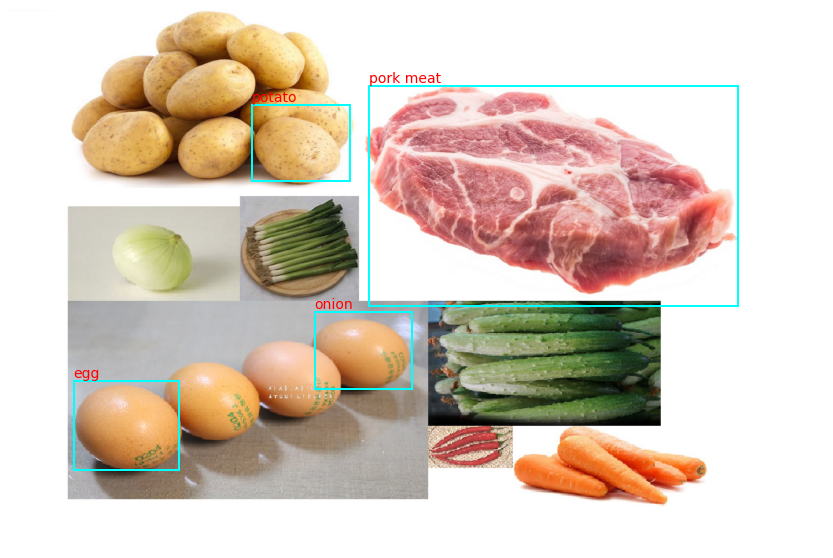

In [0]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(20, 10))
fig.patch.set_visible(False)
ax.axis('off')

# If the image is already a tensor, convert it back to a PILImage
# and reverse normalize it
if isinstance(image, torch.Tensor):
    image = reverse_normalize(image)
    image = transforms.ToPILImage()(image)
ax.imshow(image)

# Show a single box or multiple if provided
if boxes.ndim == 1:
    boxes = boxes.view(1, 4)

if labels is not None and not utils._is_iterable(labels):
    labels = [labels]

# Plot each box
for i in range(boxes.shape[0]):
    box = boxes[i]
    width, height = (box[2] - box[0]).item(), (box[3] - box[1]).item()
    initial_pos = (box[0].item(), box[1].item())
    rect = patches.Rectangle(initial_pos, width, height, linewidth=2, edgecolor='cyan', facecolor='none')
    if labels:
        ax.text(box[0], box[1] - 10, '{}'.format(labels[i]), color='red')

    ax.add_patch(rect)